<h1> Classification of a tumor as Malignant or Benign</h1>

In this cell, we are importing all the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

loading the dataset named "breast-cancer.csv" into our python notebook using pandas.

In [2]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>Let us investigae the dataset a little (Pre-processing).<h3>

In [3]:
df.shape

(569, 32)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Here we are changing the classes as following
<br>
1=M(Malignant) <br>
0=B(Begnin)<br> 
for our better understanging of what is a positive case and what is a negetive case.

In [5]:
l1=df['diagnosis']=='M'

In [6]:
l2=[]
for i in l1:
    if i is True:
        l2.append(1)
    else:
        l2.append(0)
        

In [7]:
df['diagnosis']=l2

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Checking how many datapoints is positive and how many are negetive.

In [9]:
df.groupby('diagnosis')['id'].nunique()

diagnosis
0    357
1    212
Name: id, dtype: int64

From the above code segment, we can see that that there are 357 negative cases in our dataset and 212 positive cases.<br><br>
Now let's check how many 'Nan' values are there in our dataset.

In [10]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

From the above result snippet, we can clearly see that there are no 'Nan' values in our dataset.<br>So, there is no need for data imputation in our dataset.<br><br>Now let's select conduct feature selection on the dataset.

In [11]:
corr=df.corr()

<AxesSubplot:>

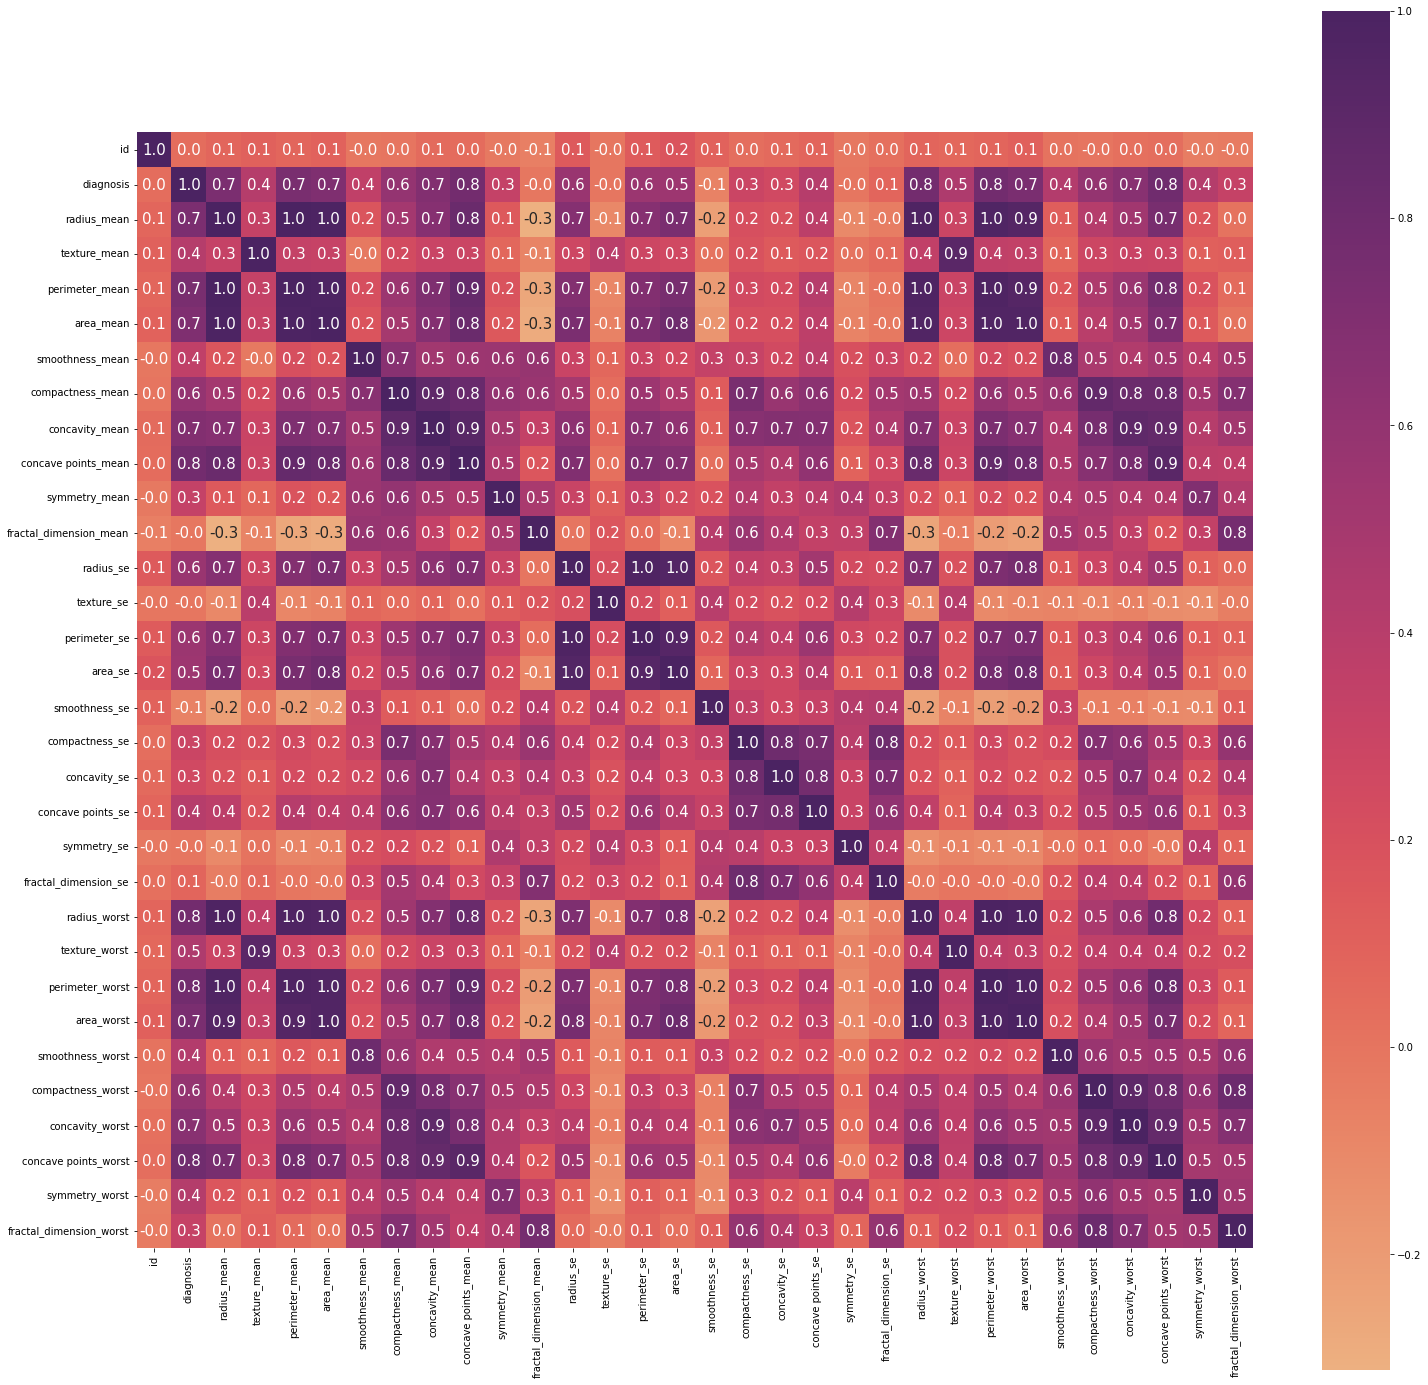

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='flare')

In [13]:
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Now based on the above correlation, we will remove the columns that have low correlation with the target(diagnosis) or high correlation with each other.

In [14]:
df.drop(["fractal_dimension_se", "symmetry_se", "smoothness_se","texture_se","fractal_dimension_mean","fractal_dimension_worst","concavity_se","compactness_se","symmetry_mean","smoothness_mean","texture_mean","concavity_mean","area_se","perimeter_worst","perimeter_mean"], axis=1,inplace=True)

In [15]:
df

,id,diagnosis,radius_mean,area_mean,compactness_mean,concave points_mean,radius_se,perimeter_se,concave points_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,1,17.99,1001.0,0.27760,0.14710,1.0950,8.589,0.01587,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,842517,1,20.57,1326.0,0.07864,0.07017,0.5435,3.398,0.01340,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,84300903,1,19.69,1203.0,0.15990,0.12790,0.7456,4.585,0.02058,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,84348301,1,11.42,386.1,0.28390,0.10520,0.4956,3.445,0.01867,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,84358402,1,20.29,1297.0,0.13280,0.10430,0.7572,5.438,0.01885,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,1479.0,0.11590,0.13890,1.1760,7.673,0.02454,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,926682,1,20.13,1261.0,0.10340,0.09791,0.7655,5.203,0.01678,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,926954,1,16.60,858.1,0.10230,0.05302,0.4564,3.425,0.01557,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,927241,1,20.60,1265.0,0.27700,0.15200,0.7260,5.772,0.01664,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [16]:
df.shape

(569, 17)

In [17]:
col_ranges = df.max() - df.min()

In [18]:
print("Maximum: ",max(col_ranges))
print("Minimum: ",min(col_ranges))

Maximum:  911311832.0
Minimum:  0.05279


From the above code, it is clear that the range of values of the attributes varies very highly.<br><br>
So, we will have to perform normalization on the data. We will be using z score feature normalization here which is available under sklearn.preprocessing as StandardScaler function.

In [19]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'area_mean', 'compactness_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [20]:
X=df[['radius_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','concave points_se','radius_worst','texture_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst']].values
Y=df['diagnosis'].values

In [21]:
X=StandardScaler().fit(X).transform(X.astype(float))

Now we will split the dataset into train and test set.

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=55)

<h2>K-Nearest Neighbours</h2>

In [23]:
import random
knn = KNeighborsClassifier()
k = list(range(1, 21))
param = dict(n_neighbors=k)

In [24]:
random.seed(55)
grid = GridSearchCV(knn, param, cv=5, scoring='f1', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [25]:
print(grid_search.best_params_)

{'n_neighbors': 7}


According to the grid serach cv algorithm, the best results are obtained for k value of 7. 

In [26]:
f1_score = grid_search.best_score_ 
print("F1 score for our training dataset with tuning is : {:.4f}".format(f1_score))

F1 score for our training dataset with tuning is : 0.9604


So, for the training set, the best f1-score is 0.9731 after gridsearch cv with 5 folds.<br><br>
Now let's use this for the test set we created earlier and see how well it does on various scoring techniques.
<br><br>
<h4>Accuracy score for test set</h4>

In [27]:
random.seed(55)
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
accuracy=knn.score(X_test,y_test)
print("Accuracy score for our training dataset with tuning is : {:.4f}".format(accuracy))

Accuracy score for our training dataset with tuning is : 0.9884


<h4>F1 score for test set</h4>

In [28]:
y_pred=knn.predict(X_test)

In [29]:
from sklearn.metrics import f1_score
print("F1 score for our testing dataset is : {:.4f}".format(f1_score(y_test,y_pred)))

F1 score for our testing dataset is : 0.9877


<h4>Jaccard score for test set</h4>

In [30]:
from sklearn.metrics import jaccard_score
print("Jaccard score for our testing dataset is : {:.4f}".format(jaccard_score(y_test,y_pred)))

Jaccard score for our testing dataset is : 0.9756


<h4>Logarithmic-loss for test set</h4>

In [31]:
from sklearn.metrics import log_loss
y2=knn.predict_proba(X_test)
print("Log-loss for our testing dataset is : {:.4f}".format(log_loss(y_test,y2)))

Log-loss for our testing dataset is : 0.0590


<AxesSubplot:>

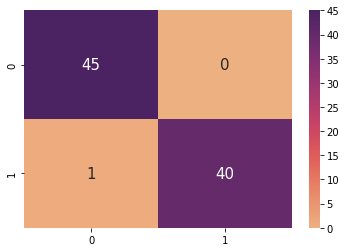

In [32]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':15},cmap='flare')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        41

    accuracy                           0.99        86
   macro avg       0.99      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



C:\Users\Ninaad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


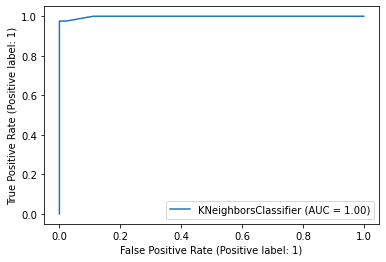

In [34]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn,X_test,y_test)

<h2>Decision Tree</h2>

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import random

In [36]:
dt =DecisionTreeClassifier()

In [37]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
param = dict(criterion=criterion,max_depth=max_depth)

In [38]:
random.seed(55)
grid_dt=GridSearchCV(dt,param,cv=5,scoring='f1',return_train_score=False)
grid_search_dt=grid_dt.fit(X_train, y_train)

In [39]:
print(grid_search_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


According to the gridsearch cv with 5 folds the highest f1 score is acquired when the following parameters are used "criterion"="entropy" and "max_depth"=4.

In [40]:
f1_score = grid_search_dt.best_score_ 
print("F1 score for our training dataset with tuning is : {:.4f}".format(f1_score))

F1 score for our training dataset with tuning is : 0.9308


So, for the training set, the best f1-score is 0.9312 after gridsearch cv with 5 folds.<br><br>
Now let's use this for the test set we created earlier and see how well it does on various scoring techniques.
<br><br>
<h4>Accuracy score for test set</h4>

In [41]:
random.seed(55)
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train,y_train)
accuracy=dt1.score(X_test,y_test)
print("Accuracy score for our training dataset with tuning is : {:.4f}".format(accuracy))

Accuracy score for our training dataset with tuning is : 0.9419


<h4>F1 score for test set</h4>

In [42]:
y_pred=dt1.predict(X_test)

In [43]:
from sklearn.metrics import f1_score
print("F1 score for our testing dataset is : {:.4f}".format(f1_score(y_test,y_pred)))

F1 score for our testing dataset is : 0.9398


<h4>Jaccard score for test set</h4>

In [44]:
from sklearn.metrics import jaccard_score
print("Jaccard score for our testing dataset is : {:.4f}".format(jaccard_score(y_test,y_pred)))

Jaccard score for our testing dataset is : 0.8864


<AxesSubplot:>

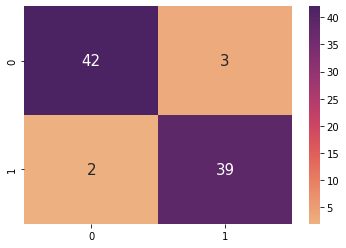

In [45]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':15},cmap='flare')

C:\Users\Ninaad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


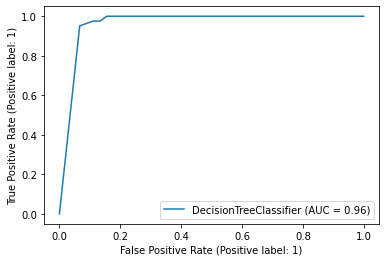

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt1,X_test,y_test)

In [50]:
feat=['radius_mean', 'area_mean', 'compactness_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']

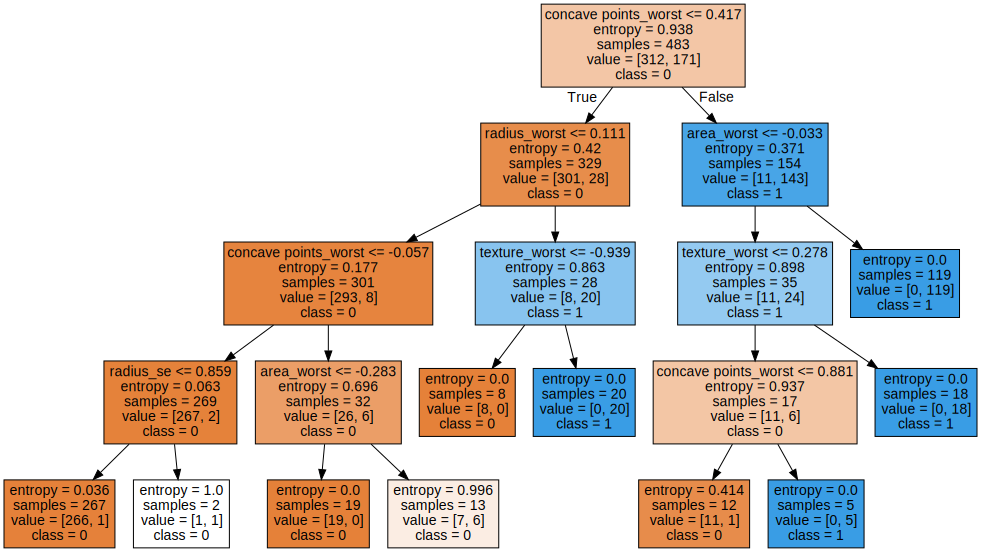

In [51]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt1, out_file=None,feature_names=feat,class_names='01',filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph